EJERCICIO 05


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
z, T = np.loadtxt('DATA.txt', unpack = True)
n = len(T)

In [3]:
z

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [4]:
T

array([70., 68., 55., 22., 13., 11., 10.])

Text(0, 0.5, 'T')

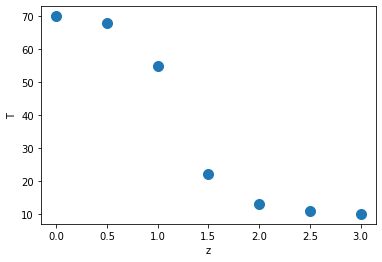

In [5]:
plt.plot(z,T,'o', ms = 10)
plt.xlabel('z')
plt.ylabel('T')

(Xi, Yi)i=1...N 

Ii = [Xi, Xi+1]

fi = ai(x - Xi)^3 + bi(x - Xi)^2 + ci(x - Xi) + di

Si tengo N puntos necesito N-1 polinomios de grado 3 para que sean dos veces derivables y continuos.
Sistema de ecuaciones que resuelvo de manera recursiva. La condicion es que los polinomios tienen el mismo valor en los puntos compartidos.

Condiciones de contorno:
-definir un valor a las derivadas segundas en los extremos, por ejemplo cero.

Referencia: apunte Interpolacion

In [6]:
H = []     #Defino el espaciado H

for i in range(n-1):
    H.append(z[i+1] - z[i])
    

In [7]:
H

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [132]:
#Defino la matriz
#excluye fila 1 y n+1
matriz = np.zeros([n, n])
D = np.zeros((n,))     #Vector de cargas Y

for i in range(1, n-1):
    matriz[i, i-1] = H[i-1]
    matriz[i, i] = 2*(H[1] + H[i-1])
    matriz[i, i+1] = H[i]
    D[i] = ((T[i+1]-T[i])/H[i] - (T[i]-T[i-1])/H[i-1])   #Ojo que no arranque en cero #Escribir el vector de cargas
matriz[0][0] = 1
matriz[n-1][n-1] = 1
D = 3*np.array(D)

In [133]:
D


array([   0.,  -66., -120.,  144.,   42.,    6.,    0.])

In [143]:
#Encontrar vector b: Invertir la matriz y multiplicar por D o directamente usar linalg.solve

b = np.linalg.solve(matriz, D)

In [144]:
b

array([  0.        , -13.01538462, -79.93846154,  92.76923077,
        -3.13846154,   3.78461538,  -0.        ])

#Ahora calcular los coeficientes del polinomio que faltan (a y c).. di = yi
#4 coeficientes por intervalo, 4(N-1) incognitas

Las condiciones de contorno agregan 2 ecuaciones para resolver el sistema:


In [145]:

a = np.zeros((n-1,))
c = np.zeros((n-1,))
d= np.zeros((n-1,))

for i in range(len(b)-1):
    a[i] = ((b[i+1] - b[i])/(3*H[i]))
    c[i] = ((T[i+1] - T[i])/H[i]) - (b[i]*H[i]) - (a[i]*H[i]**2)
    d[i] = T[i]

In [146]:
b



array([  0.        , -13.01538462, -79.93846154,  92.76923077,
        -3.13846154,   3.78461538,  -0.        ])

In [155]:
b1 = b[:len(b)-1]
P = [a, b1, c, d]
p=np.zeros([len(P[0]), 4])
for i in range(4):
    p[:, i] = P[i]      #coeficientes de los polinomios para cada intervalo H. (en cada fila)

In [166]:
 p[:, :3] 

array([[ -8.67692308,   0.        ,  -1.83076923],
       [-44.61538462, -13.01538462,  -8.33846154],
       [115.13846154, -79.93846154, -54.81538462],
       [-63.93846154,  92.76923077, -48.4       ],
       [  4.61538462,  -3.13846154,  -3.58461538],
       [ -2.52307692,   3.78461538,  -3.26153846]])


P(z-z[i]):

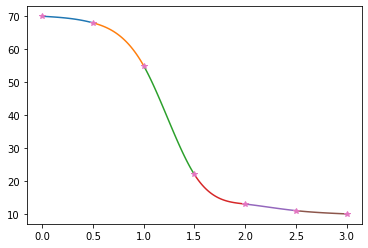

In [165]:
for i in range(n-1):
    x = np.linspace(z[i], z[i+1], 80)
    plt.plot(x, np.polyval(p[i], x-z[i]))
plt.plot(z, T, '*')

In [170]:
#Derivadas
p_der = copy.copy(p[:, :3])
p_der[:,0] = 3*p_der[:,0]
p_der[:,1] = 2*p_der[:,1]

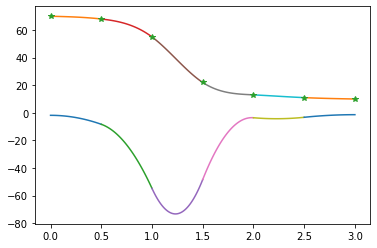

In [177]:
pol_der = []
xx = []
for i in range(n-1):
    x = np.linspace(z[i], z[i+1], 100)
    pol1 = np.polyval(p_der[i], x-z[i])
    plt.plot(x, pol1)
    plt.plot(x, np.polyval(p[i], x-z[i]))
    pol_der.append(pol1)
    xx.append(x)
plt.plot(z, T, '*')

In [186]:
der = np.array(pol_der).ravel()     #funcion derivada en un unico array
minimo = min(der)                   #Derivada segunda nula --> capa thermocline
pos = np.array(xx).ravel()


In [196]:
minimo

-73.31502907866545

In [195]:
#np.where(der == minimo)
pos[der.argmin()]                   #Profundidad a la cual se encuentra la capa thermocline [m]

1.2323232323232323